# A visual introduction to fundamental modern machine Learning

*Yash Mali*  
2025-07-24

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# from graphviz import Digraph
from IPython.display import display
from ipywidgets import interact, FloatSlider
np.random.seed(19_750)

What is Deep Learning, Machine Learning, and Artificial Intelligence?

A Simple History of AI In the 1950s, scientists dreamed of building
machines that could think and learn like humans. They created early
models called neural networks, inspired by how the brain works. One of
the first, called the Perceptron, was built by Frank Rosenblatt. But
back then, computers were too slow, and there wasn’t enough data to make
these systems work well. So, researchers moved on to simpler methods,
largely ignoring neural networks.

In 2012, everything changed with a breakthrough called AlexNet. It was a
large neural network that could look at pictures and recognize objects
(like cats, dogs and cars etc.) better than anything before. It was
taught how to recognize images very efficiently and which allowed it to
see millions of images and learning how to recognize patterns, stitch
them together, and make predictions.

In 2017, another big leap happened with the invention of Transformers.
These systems could understand very long sequences (like language) at
once, making them great at tasks like writing, translating, and
summarizing text. This is the technology behind tools like ChatGPT,
which can chat, write stories, or even help with coding.

## What makes AI good at its job?

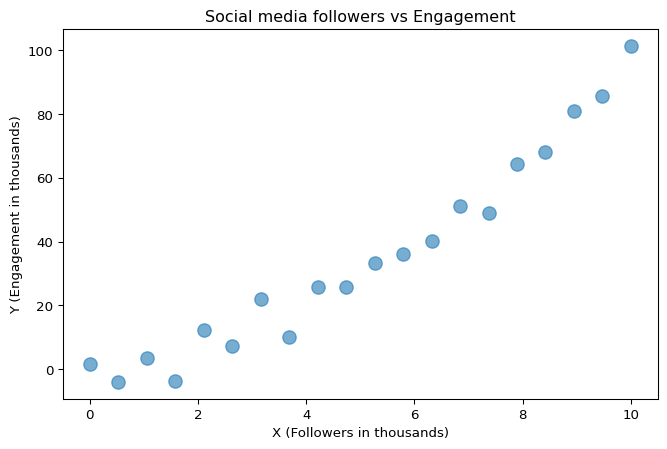

In [2]:
# Generate 20 random x values
x = np.linspace(0, 10, 20)

# Compute y values with some noise
y = x**2 + np.random.normal(0, 5, x.shape)

# Plot the points using seaborn with slightly bigger points
plt.figure(figsize=(8, 5))
plt.scatter(x=x, y=y, s=100, alpha=0.6, label='Data')
plt.title('Social media followers vs Engagement')
plt.xlabel('X (Followers in thousands)')
plt.ylabel('Y (Engagement in thousands)')
plt.show()

This is a plot of social media followers vs engagement. Lets say you
want to predict engagement based on followers.

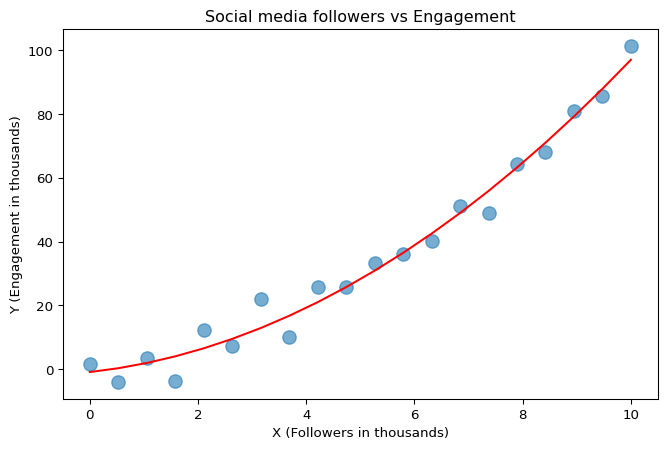

In [3]:
degree = 2
# Fit a polynomial of given degree to the data using numpy
coeffs = np.polyfit(x, y, degree)

# Compute predicted y values
y_pred_2 = np.polyval(coeffs, x)

# Plot the original data and the fitted polynomial
plt.figure(figsize=(8, 5))
plt.scatter(x=x, y=y, s=100, alpha=0.6, label='Data')
plt.plot(x, y_pred_2, color='red', label=f'Degree {degree} Fit')
plt.title('Social media followers vs Engagement')
plt.xlabel('X (Followers in thousands)')
plt.ylabel('Y (Engagement in thousands)')
plt.show()

This red line “fit” to the data

/var/folders/8h/xvvxd2jn0455sn6vs3kxywdc0000gn/T/ipykernel_90875/285428849.py:4: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(x, y, degree)

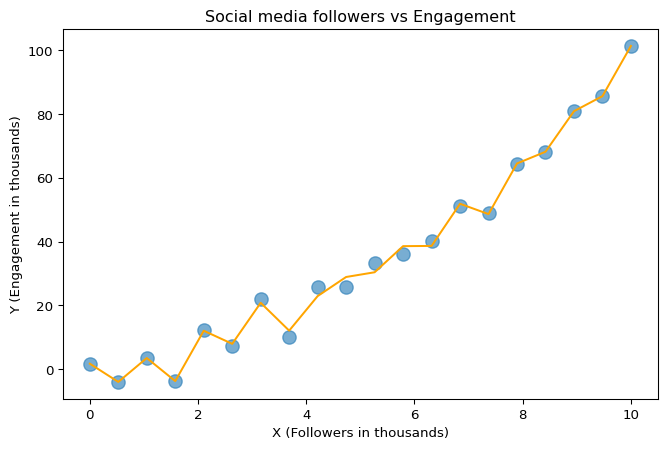

In [4]:
degree = 20

# Fit a polynomial of given degree to the data using numpy
coeffs = np.polyfit(x, y, degree)
# Compute predicted y values
y_pred_15 = np.polyval(coeffs, x)

# Plot the original data and the fitted polynomial
plt.figure(figsize=(8, 5))
plt.scatter(x=x, y=y, s=100, alpha=0.6, label='Data')
plt.plot(x, y_pred_15, color='orange', label=f'Degree {degree} Fit')
plt.title('Social media followers vs Engagement')
plt.xlabel('X (Followers in thousands)')
plt.ylabel('Y (Engagement in thousands)')
plt.show()

This orange line “fit” to the data

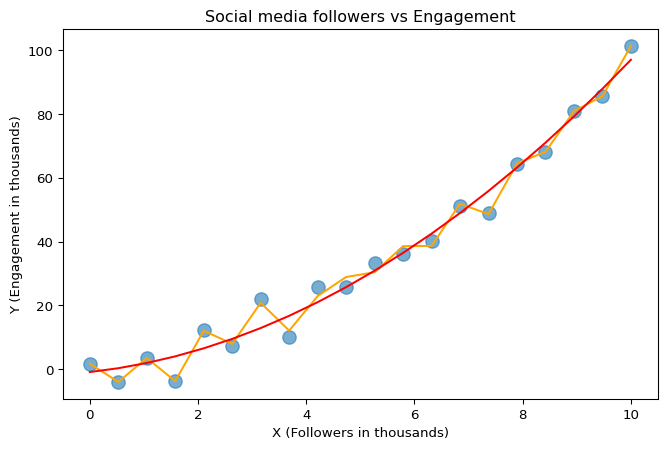

In [5]:
plt.figure(figsize=(8, 5))
plt.scatter(x=x, y=y, s=100, alpha=0.6, label='Data')
plt.plot(x, y_pred_15, color='orange', label=f'Degree {15} Fit')
plt.plot(x, y_pred_2, color='red', label=f'Degree {2} Fit')
plt.title('Social media followers vs Engagement')
plt.xlabel('X (Followers in thousands)')
plt.ylabel('Y (Engagement in thousands)')
plt.show()

What is better?

The red line *seems* better, but the orange line has lower error since
it goes directly through ALL points.

Say you put a point between some of the blue dots? Is the orange line
more likely to predict a better position for the points or the red?

-   No! The red line generalizes to points that don’t exist in the plot
    much better.

What about if you add points to the left and right of the existing
points?

-   The red line does better again for unseen points.

------------------------------------------------------------------------

To prevent your model from memorizing your data, you intentionally split
your data into 2. **The training data and testing data.** The test data
should not influence training in any way.

Credit - CPSC 330
<!-- <img src="https://ubc-cs.github.io/cpsc330-2024W1/_media/train-test-split.png" alt="AI, ML, DL" width="750">-->

Key Takeaways

-   Your model needs to be able to generalize.
-   Your model should not blindly memorize the data it is given. Eg.
    force its way through every point.
-   The test data should not influence training in any way.

This is the fundamental rule of learning.

Example:

Say your vision model to drive self-driving cars is trained with lots of
videos from Los Angeles (Now you drive to Vancouver and realize that
your system works a lot worse. One reason for this is that the model
**is too used to** the LA data.

In reality, self-driving cars are trained on data from all types of
cities, suburbs, and rural areas, as well as in all driving conditions
and weather. **But** when highly unexpected things happen (like
sandstorms or forest fires that make the sky orange), these systems
perform worse.

*TLDR;* **Your predictor should generalize and find the underlying
pattern not memorize that data it has seen like a puppet.**

## Neural Networks

### Example 1

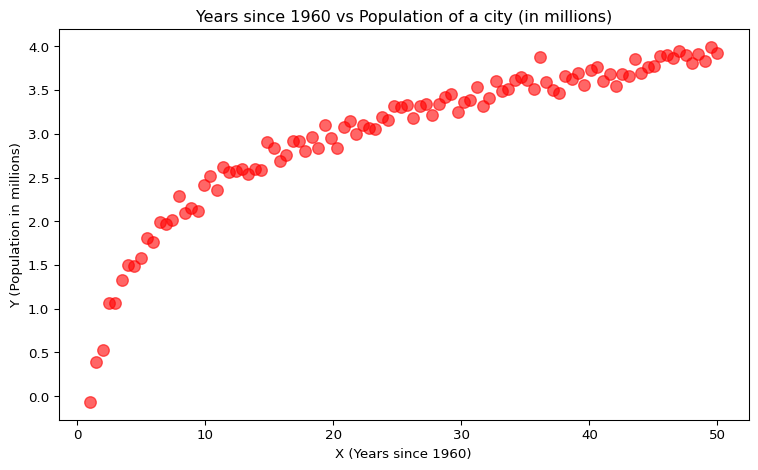

In [6]:
x = np.linspace(1, 50, 100)
# Generate y values for -log(x) with noise
y_neg_log = np.log(x) + np.random.normal(scale=0.1, size=x.shape)

# Create the scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(x, y_neg_log, label='Data', color='red', s=75, alpha=0.6)
plt.title('Years since 1960 vs Population of a city (in millions)')
plt.xlabel('X (Years since 1960)')
plt.ylabel('Y (Population in millions)')
plt.tight_layout()
plt.show()

We cannot draw a line through this data.

<>:12: SyntaxWarning: invalid escape sequence '\s'
<>:12: SyntaxWarning: invalid escape sequence '\s'
/var/folders/8h/xvvxd2jn0455sn6vs3kxywdc0000gn/T/ipykernel_90875/1384477353.py:12: SyntaxWarning: invalid escape sequence '\s'
  plt.xlabel('$\sqrt{X}$ (Years since 1960)')

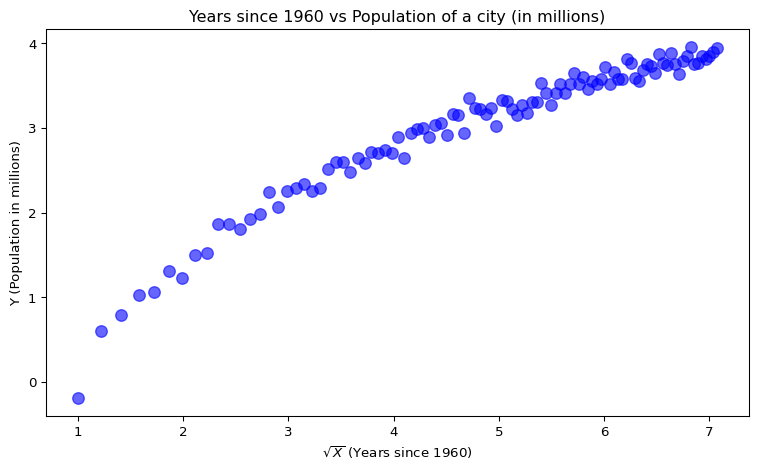

In [7]:
# Original data
x = np.linspace(1, 50, 100)
y_neg_log = np.log(x) + np.random.normal(scale=0.1, size=x.shape)

# Apply a square root transformation to x
x_transformed = np.sqrt(x)

# Create the scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(x_transformed, y_neg_log, label='Stretched Data', color='blue', s=75, alpha=0.6)
plt.title('Years since 1960 vs Population of a city (in millions)')
plt.xlabel('$\sqrt{X}$ (Years since 1960)')
plt.ylabel('Y (Population in millions)')
plt.tight_layout()
plt.show()

Here we compressed the X axis and made the data **easier to draw a line
through**.

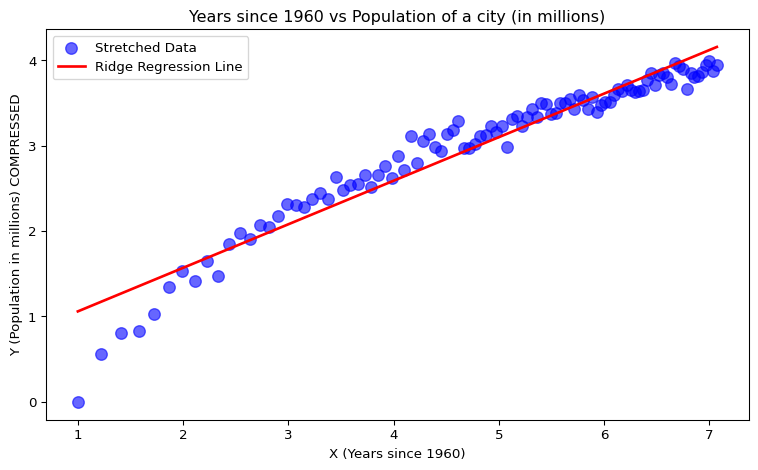

In [8]:
from sklearn.linear_model import Ridge

# Original data
x = np.linspace(1, 50, 100)
y_neg_log = np.log(x) + np.random.normal(scale=0.1, size=x.shape)

# Apply a square root transformation to x
x_transformed = np.sqrt(x).reshape(-1, 1)

# Fit Ridge regression
ridge = Ridge(alpha=1.0)
ridge.fit(x_transformed, y_neg_log)
y_pred = ridge.predict(x_transformed)

# Create the scatter plot + ridge line
plt.figure(figsize=(8, 5))
plt.scatter(x_transformed, y_neg_log, label='Stretched Data', color='blue', s=75, alpha=0.6)
plt.plot(x_transformed, y_pred, color='red', linewidth=2, label='Ridge Regression Line')
plt.title('Years since 1960 vs Population of a city (in millions)')
plt.xlabel('X (Years since 1960)')
plt.ylabel('Y (Population in millions) COMPRESSED')
plt.legend()
plt.tight_layout()
plt.show()

This is what neural networks do. They make it easier to draw a line
through or draw a line separating the data. We will use another example
to make it clearer.

Neural networks facilitate the **“Make the data easier to work with”**
step. They do so by learning the transformation needed to do so by
looking at the data.

### Example 2 and what do models learn?

**Another example where we classify data.**

Say we have data that has coordinates (longitude and latitude), and the
data are people. You want to classify the people based on “living in
urban areas” and “living in rural areas”. This data can look like the
following:

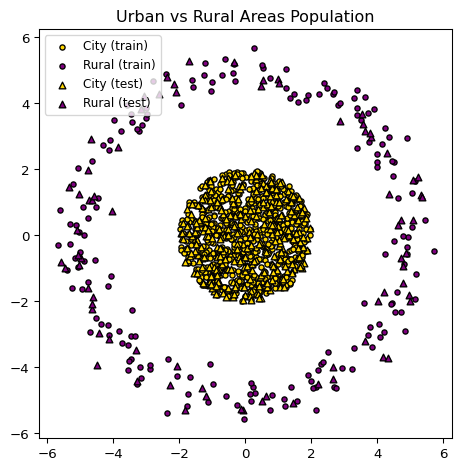

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

rng = np.random.default_rng(19_750)
r_city, r_rural = 2.0, 5.0

# Generate "city" as a dense filled disk (class 1)
n_city = 1000
theta_c = 2 * np.pi * rng.random(n_city)
r_c = r_city * np.sqrt(rng.random(n_city))  # uniform over area
x_c = r_c * np.cos(theta_c)
y_c = r_c * np.sin(theta_c)

# Generate "rural" as a sparse thin ring (class 0)
n_rural = 250
theta_r = 2 * np.pi * rng.random(n_rural)
r_r = r_rural + rng.normal(0, 0.35, n_rural)  # thin ring
x_r = r_r * np.cos(theta_r)
y_r = r_r * np.sin(theta_r)

# Stack data
X = np.vstack([np.c_[x_r, y_r], np.c_[x_c, y_c]])
y = np.concatenate([np.zeros(n_rural, dtype=int), np.ones(n_city, dtype=int)])

Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Just plot the data (train and test, color by class)
plt.figure(figsize=(6, 5))
plt.scatter(Xtr[ytr == 1, 0], Xtr[ytr == 1, 1], s=15, c='gold', edgecolor='k', label='City (train)')
plt.scatter(Xtr[ytr == 0, 0], Xtr[ytr == 0, 1], s=15, c='purple', edgecolor='k', label='Rural (train)')
plt.scatter(Xte[yte == 1, 0], Xte[yte == 1, 1], s=25, c='gold', edgecolor='k', marker='^', label='City (test)')
plt.scatter(Xte[yte == 0, 0], Xte[yte == 0, 1], s=25, c='purple', edgecolor='k', marker='^', label='Rural (test)')
plt.legend(loc='best', fontsize=9)
plt.title("Urban vs Rural Areas Population")
plt.gca().set_aspect('equal')
plt.tight_layout()
plt.show()

You might want to do this classifying for resource allocation. For
example, where should I put more fire stations?

Though here, it is just a simple example/demonstration. You cannot draw
a line to seperate the 2 polulations.

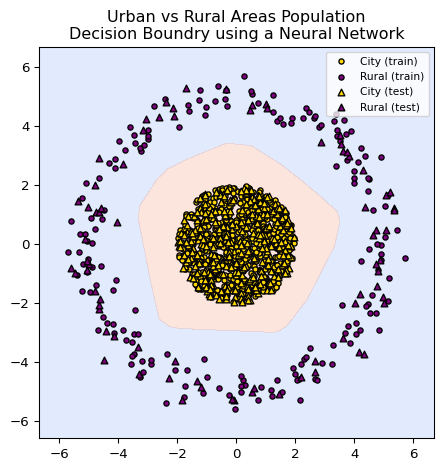

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Small neural net (non-linear)
mlp = MLPClassifier(hidden_layer_sizes=(8, 8), activation='relu', solver='lbfgs', alpha=1e-4, random_state=42, max_iter=2000)
mlp.fit(Xtr, ytr)

acc_mlp = accuracy_score(yte, mlp.predict(Xte))

# Decision boundary visualization for MLP only
x_min, x_max = X[:, 0].min() - 1.0, X[:, 0].max() + 1.0
y_min, y_max = X[:, 1].min() - 1.0, X[:, 1].max() + 1.0
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 400), np.linspace(y_min, y_max, 400))
grid = np.c_[xx.ravel(), yy.ravel()]

Z_mlp = mlp.predict_proba(grid)[:, 1].reshape(xx.shape)

fig, ax = plt.subplots(figsize=(6, 5))
cs = ax.contourf(xx, yy, Z_mlp, levels=[0.0, 0.5, 1.0], alpha=0.25, cmap='coolwarm')
ax.scatter(Xtr[ytr == 1, 0], Xtr[ytr == 1, 1], s=15, c='gold', edgecolor='k', label='City (train)')
ax.scatter(Xtr[ytr == 0, 0], Xtr[ytr == 0, 1], s=15, c='purple', edgecolor='k', label='Rural (train)')
ax.scatter(Xte[yte == 1, 0], Xte[yte == 1, 1], s=25, c='gold', edgecolor='k', marker='^', label='City (test)')
ax.scatter(Xte[yte == 0, 0], Xte[yte == 0, 1], s=25, c='purple', edgecolor='k', marker='^', label='Rural (test)')
ax.set_title(f"Neural net (MLP) — acc={acc_mlp:.3f}")
ax.set_aspect('equal')
ax.legend(loc='upper right', fontsize=8)
plt.title("Urban vs Rural Areas Population\nDecision Boundry using a Neural Network")
plt.tight_layout()
plt.show()

What might have the neural network done to classify things correctly?

This is a very difficult problem. We only have glimses into what neural
networks learn and how they internally represent things.

But in this case, we could venture a guess and suggest that the model
may be doing something like this:

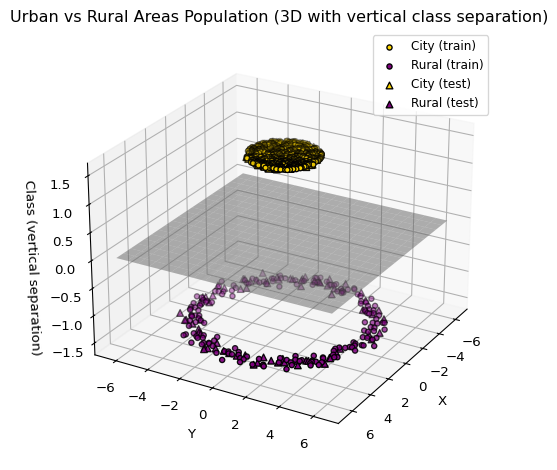

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

rng = np.random.default_rng(19_750)
r_city, r_rural = 2.0, 5.0

# Generate "city" as a dense filled disk (class 1)
n_city = 1000
theta_c = 2 * np.pi * rng.random(n_city)
r_c = r_city * np.sqrt(rng.random(n_city))
x_c = r_c * np.cos(theta_c)
y_c = r_c * np.sin(theta_c)

# Generate "rural" as a sparse thin ring (class 0)
n_rural = 250
theta_r = 2 * np.pi * rng.random(n_rural)
r_r = r_rural + rng.normal(0, 0.35, n_rural)
x_r = r_r * np.cos(theta_r)
y_r = r_r * np.sin(theta_r)

# Vertical separation for classes
z_c = np.full_like(x_c, 1.5)      # City at height 1.5
z_r = np.full_like(x_r, -1.5)     # Rural at height -1.5

# Stack data
X_city = np.c_[x_c, y_c, z_c]
X_rural = np.c_[x_r, y_r, z_r]
X = np.vstack([X_rural, X_city])
y = np.concatenate([np.zeros(n_rural, dtype=int), np.ones(n_city, dtype=int)])

Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1975)

# 3D plot with vertical separation
fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')

# Train points
ax.scatter(Xtr[ytr == 1, 0], Xtr[ytr == 1, 1], Xtr[ytr == 1, 2], s=15, c='gold', edgecolor='k', label='City (train)')
ax.scatter(Xtr[ytr == 0, 0], Xtr[ytr == 0, 1], Xtr[ytr == 0, 2], s=15, c='purple', edgecolor='k', label='Rural (train)')

# Test points
ax.scatter(Xte[yte == 1, 0], Xte[yte == 1, 1], Xte[yte == 1, 2], s=25, c='gold', edgecolor='k', marker='^', label='City (test)')
ax.scatter(Xte[yte == 0, 0], Xte[yte == 0, 1], Xte[yte == 0, 2], s=25, c='purple', edgecolor='k', marker='^', label='Rural (test)')

# Draw a separating plane between classes (e.g., z=0)
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(*xlim, 20), np.linspace(*ylim, 20))
zz = np.zeros_like(xx)  # Plane at z=0

ax.plot_surface(xx, yy, zz, alpha=0.5, color='gray', edgecolor='none')

ax.set_title("Urban vs Rural Areas Population (3D with vertical class separation)")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Class (vertical separation)")
ax.view_init(elev=25, azim=30)
ax.legend(loc='best', fontsize=9)
plt.tight_layout()
plt.show()

This could be a good guess (approximately) of what a neural network does
to separate between rural and urban populations.

So what drives the model to do this? How does **it** decide to do this?

### How does the model learn?

One thing to note is that we don’t tell the model to do something like
this; it decides on its own. This is why we don’t understand how AI
works in any practical model. We simply specify the problem.

Here, the specification can be “minimize the mistakes in classifying
between the 2 populations”. Then you pick the correct parameters (using
calculus), and the model has learned to do its job.

### Deep Learning

Deep learning is simply when you make these geometric decisions in steps
rather than all at once this has made models much more practical and
powerful

**What is the point of this?**

-   Model any written language that has ever existed. Translate between
    any languages. ChatGPT simply classifies the next word and is able
    to reason, help, deceive, and “think”.

-   Predict the weather.

-   Model any type of music or images, or everything altogether to
    create videos.

-   Drive cars, move robots, and do surgery (poorly for now).

-   Predict the stock market (to some extent). Detect fraud every time
    you swipe your credit card.

-   Spot cancer, strokes, and blood clots. Discover new drugs and select
    genes.

## Risks and misuse.

**But with all these capabilities come risks.** These can be very
broadly characterized into:

1.  Risks of misuse.
2.  Inherent risks of the model.

Some inherent risk can emerge from models being trained on biased
(human) data.

------------------------------------------------------------------------

Inherent

<img src="media/noise_adv.png" style="max-width:80%; height:auto;">

Credit - CPSC 340, L35

------------------------------------------------------------------------

Misuse

<img src="media/doge.png" style="max-width:80%; height:auto;">

Credit - The Independent

------------------------------------------------------------------------

Inherent

<img src="media/obamna.png" style="max-width:80%; height:auto;">

Credit - CPSC 340, L35

------------------------------------------------------------------------

Inherent

<img src="media/translate.png" style="max-width:80%; height:auto;">

Credit - CPSC 340, L35

------------------------------------------------------------------------

Misuse

<img src="media/deepfake.png" style="max-width:80%; height:auto;">

Credit - CPSC 340, L35

------------------------------------------------------------------------

Misuse & Inherent

<img src="media/resume_amazon.png" style="max-width:80%; height:auto;">

Credit - BBC

------------------------------------------------------------------------

Misuse

<img src="media/bail.png" style="max-width:80%; height:auto;">

Credit - MIT Technology Review

------------------------------------------------------------------------

More:

-   Automated hacking and scams.
-   Giving AI control of a banking/credit database.
-   Copyright regulation. AI books, music, and movies that look like
    others.
-   Using AI to persuade groups of people and communities online.
-   And so much more!

People will misuse AI, and computer scientists are working on trying to
make that harder. But turning models “unsafe” and “harmful” is still
very easy to do. For free within ~3 hours for a smaller open version of
ChatGPT.

For the inherent risks of AI, we need to invest more time and energy
into understanding what the models are learning rather than purely
focusing on the results or what the models can do.

We also need people from different domains to understand, use and play a
role in making AI (eg. curating diverse data). In the meantime, we must
be careful not to give AI control over systems where its unexpected
performance can hurt people (eg, deciding if someone can go to jail)

# Bonus: Optimization

In [12]:
run = False
if run:
    import numpy as np
    import matplotlib.pyplot as plt
    from ipywidgets import interact, FloatSlider
    
    x = np.linspace(-5, 5, 50)
    y = 2 * x + 1 + np.random.normal(0, 2, 50)
    slopes = np.linspace(-4, 6, 100)
    mse = lambda s, i=1.0: np.mean((y - (s * x + i)) ** 2)
    mse_vals = [mse(s) for s in slopes]
    
    contour_slopes = np.linspace(-10, 12, 100)
    contour_intercepts = np.linspace(-8, 10, 100)
    S, I = np.meshgrid(contour_slopes, contour_intercepts)
    Z = np.array([[mse(S[i, j], I[i, j]) for j in range(len(contour_slopes))] for i in range(len(contour_intercepts))])
    
    def plot(s):
        i, m = 1.0, mse(s)
        fig, ax = plt.subplots(1, 3, figsize=(15, 4))
        ax[0].plot(slopes, mse_vals)
        ax[0].scatter(s, m, color='r')
        ax[0].set(title="Loss Landscape - MOVE THE SLIDER", xlabel="Parameter", ylabel="Error")
        yp = s * x + i
        ax[1].scatter(x, y)
        ax[1].plot(x, yp, 'orange')
        ax[1].set(title="Linear Model")
        cp = ax[2].contour(S, I, Z, 20)
        ax[2].scatter(s, i, color='r', marker='x', s=100)
        ax[2].set(title="Landscape Contour Plot", xlabel="Slope", ylabel="Intercept")
        fig.colorbar(cp, ax=ax[2], label="MSE")
        plt.tight_layout()
        plt.show()
    
    interact(plot, s=FloatSlider(value=2, min=-4, max=6, step=0.1))